# Housing Data EDA Template
**Student Name:** Jesse
**Dataset:** Boston Housing Dataset

This notebook provides a skeleton for loading, cleaning, and exploring the Boston Housing dataset.

## 1. Import Libraries & Load Data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sys
import os

# Add shared directory to path to import common functions
sys.path.append(os.path.abspath('../../'))
from shared.templates.common_functions import *

%matplotlib inline

In [8]:
# Load your dataset
df = pd.read_csv('../data/boston_housing.csv')
print(f"Loaded dataset with {df.shape[0]} rows and {df.shape[1]} columns.")
df.head()

Loaded dataset with 506 rows and 14 columns.


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## 2. Exploration
Check the basic structure, data types, and missing values.

In [3]:
df.info()
display(df.describe())

# Missing value report using shared function
missing_report = missing_value_report(df)
if missing_report.empty:
    print("No missing values found.")
else:
    display(missing_report)

<class 'pandas.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


No missing values found.


## 3. Cleaning & Feature Engineering
Handle missing values, outliers, and data type conversions.

In [4]:
# Rename columns for consistency if needed (already mostly consistent)
df.rename(columns={'medv': 'SalePrice'}, inplace=True)

# Feature Engineering
df['Tax_per_Room'] = df['tax'] / df['rm']
df['Lower_Income_Impact'] = df['lstat'] * df['rm']
df['Distance_Index'] = 1 / (df['dis'] + 1)

# Outlier Removal for SalePrice
df_clean = outlier_iqr_removal(df, 'SalePrice')

# Save cleaned dataset
os.makedirs('../cleaned_data', exist_ok=True)
df_clean.to_csv('../cleaned_data/cleaned_boston_housing.csv', index=False)
print(f"Cleaned data saved. Removed {len(df) - len(df_clean)} outliers.")

Cleaned data saved. Removed 40 outliers.


## 4. EDA (Exploratory Data Analysis)
Visualize distributions and relationships.

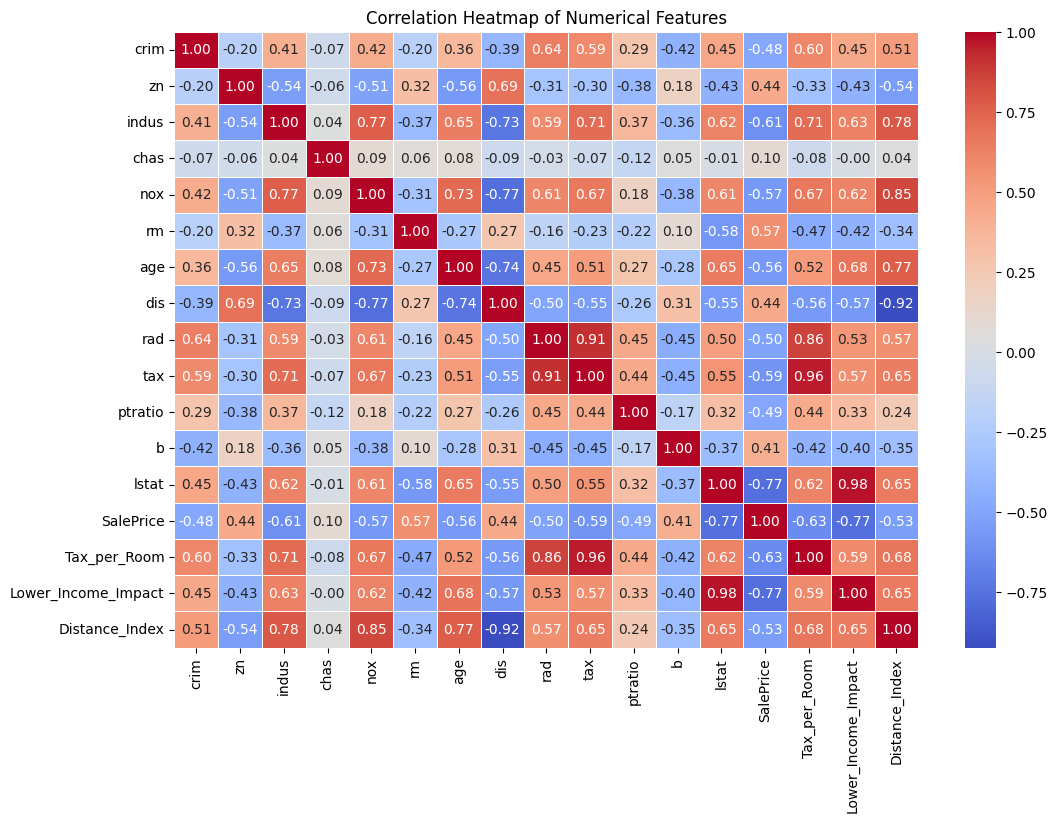

In [5]:
# 1. Histogram of SalePrice
fig1 = px.histogram(df_clean, x='SalePrice', title='Boston House Price Distribution (MEDV)', template='plotly_white')
fig1.show()

# Correlation Heatmap
correlation_heatmap(df_clean)

## 5. Visualizations (Dashboards)
Create interactive plots for key findings.

In [ ]:
# 2. Scatter: RM vs SalePrice
fig2 = px.scatter(df_clean, x='rm', y='SalePrice', trendline='ols', 
                 title='Relationship: Number of Rooms vs Sale Price', template='plotly_white')
fig2.show()

# 3. Scatter: LSTAT vs SalePrice
fig3 = px.scatter(df_clean, x='lstat', y='SalePrice', color='age', 
                 title='Relationship: % Lower Status vs Sale Price (Colored by Age)', template='plotly_white')
fig3.show()

# 4. Boxplot: SalePrice by CHAS
fig4 = px.box(df_clean, x='chas', y='SalePrice', 
             title='Sale Price vs Proximity to Charles River (CHAS=1 if near)', template='plotly_white')
fig4.show()

## 6. Insights Summary
1. **Rooms**: The number of rooms (RM) is a very strong positive indicator of price.
2. **Status**: Higher values of LSTAT (percentage of lower status of the population) are strongly associated with lower house prices.
3. **River Proximity**: Houses located near the Charles River (CHAS=1) tend to have higher median values.